Imports

In [157]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import datetime as dt
import mplfinance as mpf

PATH = "C:/Users/Corey/repositories/python/finance/"


Function that saves stock data to CSV

In [158]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    df = web.DataReader(ticker, 'yahoo', start, end)
    df.to_csv(PATH + ticker + '.csv')
    
    return df

Function that returns a dataframe from a CSV

In [159]:
def get_df_from_csv(ticker):
    try: 
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 
        return df 

Add Daily Return to Dataframe

In [160]:
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1
    df.to_csv(PATH + ticker + '.csv')
    

Returns Total Return over Time

In [161]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days*daily_ret)

Matplotlib Finance

In [162]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try: 
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type='candle')
        mpf.plot(df_sub, type='line')
        mpf.plot(df_sub, type='ohlc', mav=4)

        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        fig = mpf.figure(figsize=(12,8), style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2,sharex = ax)
        mpf.plot(df_sub, type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

Simple Price Plot

In [163]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try: 
        df = pd.read_csv(PATH + ticker + '.csv')
    except FileNotFoundError:
        print("File doesn't exist")
    else: 
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize=(12,8), dpi=100)
        axes = fig.add_axes([0,0,1,1])
        axes.plot(date_arr, np_adj_close, color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        axes.set_facecolor('#FAEBD7')

Download Multiple Stocks

In [164]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

Merge Multiple Stocks in One Dataframe by Column Name

In [165]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
    return mult_df

Get Changing Value of Investment Using Multiple Stocks

In [166]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize=(15,6))

Test functions

Total Return:  0.04777517423943911


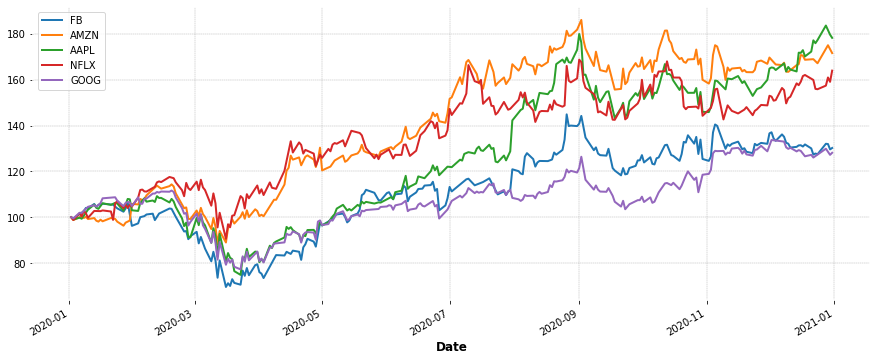

In [167]:
save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)
AMZN = get_df_from_csv('AMZN')

add_daily_return_to_df(AMZN, 'AMZN')
AMZN
total_return = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return: ", total_return)
AMZN

#mplfinance_plot('AMZN', 'ohlc', 2020, 1, 1, 2021, 1, 1)
#price_plot('AMZN', 2020, 1, 1, 2021, 1, 1)

tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
#download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

mult_df = merge_df_by_column_name('Adj Close', 2020, 1, 1, 2021, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)